Matplotlib is building the font cache; this may take a moment.


PARKINSON'S VOICE DETECTION MODEL CREATION

[1/5] Loading dataset...
Dataset shape: (195, 24)
Features: 22

First few rows:
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.009

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)


[Training model...]
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3145 - loss: 0.7975 - val_accuracy: 0.3125 - val_loss: 0.7102
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4435 - loss: 0.7129 - val_accuracy: 0.8125 - val_loss: 0.6407
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6774 - loss: 0.6507 - val_accuracy: 0.8438 - val_loss: 0.5885
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7177 - loss: 0.6168 - val_accuracy: 0.8438 - val_loss: 0.5474
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.5910 - val_accuracy: 0.8750 - val_loss: 0.5079
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.5583 - val_accuracy: 0.9062 - val_loss: 0.4715
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.5281 - val_accuracy: 0.8750 - val_loss: 0.4373
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7903 - loss: 0.4862 - val_accuracy: 0.875

AttributeError: 'Sequential' object has no attribute '_get_save_spec'

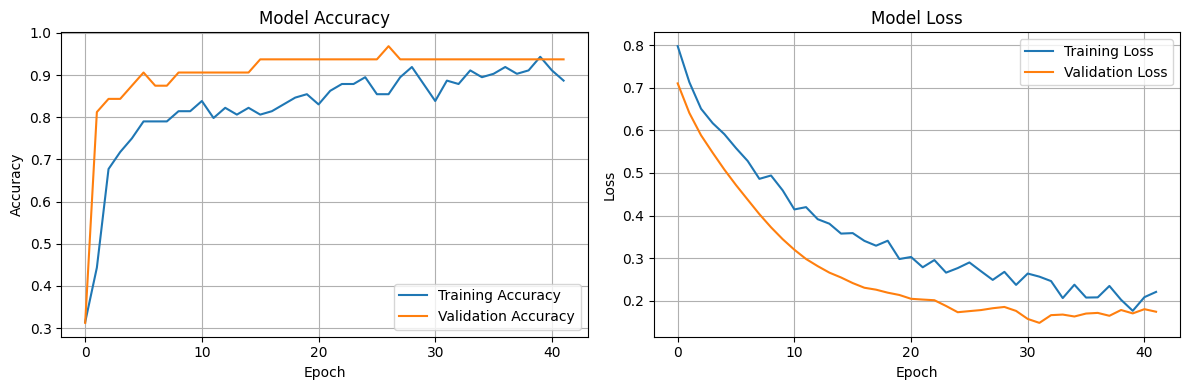

In [1]:
# ============================================
# PARKINSON'S VOICE DETECTION MODEL
# Complete guide to create and export TensorFlow Lite model
# Run this on your Windows PC
# ============================================

# STEP 1: Install required packages
# Open PowerShell and run:
# pip install tensorflow pandas numpy scikit-learn matplotlib seaborn jupyter

# STEP 2: Download the Oxford Parkinson's Dataset
# Go to: https://archive.ics.uci.edu/ml/datasets/parkinsons
# Download: parkinsons.data
# Save it to: C:\Users\YourUsername\biomedical_ml_training\data\parkinsons.data

# STEP 3: Run this entire script in Jupyter or as .py file

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pickle
import os

print("=" * 60)
print("PARKINSON'S VOICE DETECTION MODEL CREATION")
print("=" * 60)

# ============================================
# PART 1: LOAD AND EXPLORE DATA
# ============================================

print("\n[1/5] Loading dataset...")

# Load the Oxford Parkinson's dataset
df = pd.read_csv('data/parkinsons.data')

print(f"Dataset shape: {df.shape}")
print(f"Features: {df.shape[1] - 2}")  # Minus name and status
print(f"\nFirst few rows:")
print(df.head())

# Show class distribution
print(f"\nClass distribution:")
print(f"Healthy (0): {(df['status'] == 0).sum()} samples")
print(f"Parkinson's (1): {(df['status'] == 1).sum()} samples")

# ============================================
# PART 2: PREPARE DATA
# ============================================

print("\n[2/5] Preparing data...")

# Remove 'name' column (it's just identifiers)
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Show feature names (these are voice characteristics)
print(f"\nVoice features being used:")
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2d}. {col}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# IMPORTANT: Normalize the data (neural networks need this!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Data normalized using StandardScaler")

# ============================================
# PART 3: BUILD AND TRAIN MODEL
# ============================================

print("\n[3/5] Building neural network model...")

# Create a simple but effective neural network
model = tf.keras.Sequential([
    # Input layer: 22 voice features
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Prevent overfitting
    
    # Hidden layer 1
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    # Hidden layer 2
    tf.keras.layers.Dense(16, activation='relu'),
    
    # Output layer: binary classification (healthy vs Parkinson's)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model architecture:")
model.summary()

print("\n[Training model...]")

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # Use 20% of training for validation
    epochs=100,
    batch_size=16,
    verbose=1,
    callbacks=[
        # Stop early if validation doesn't improve
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ]
)

# ============================================
# PART 4: EVALUATE MODEL
# ============================================

print("\n[4/5] Evaluating model...")

# Test accuracy
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)")
print(f"Test Loss: {test_loss:.3f}")

# Predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int).flatten()

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['Healthy', "Parkinson's"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('training_history.png')
print("\n✓ Training history saved to training_history.png")

# ============================================
# PART 5: EXPORT TO TENSORFLOW LITE
# ============================================

print("\n[5/5] Converting to TensorFlow Lite...")

# Create output directory
os.makedirs('output_models', exist_ok=True)

# Convert Keras model to TensorFlow Lite
# First, save the model to disk (fixes the _get_save_spec error)
model.save('temp_model')
converter = tf.lite.TFLiteConverter.from_saved_model('temp_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
]
tflite_model = converter.convert()

# Save TensorFlow Lite model
model_path = 'output_models/parkinsons_model.tflite'
with open(model_path, 'wb') as f:
    f.write(tflite_model)

model_size_kb = os.path.getsize(model_path) / 1024
print(f"✓ Model saved to: {model_path}")
print(f"  Model size: {model_size_kb:.1f} KB")

# ============================================
# PART 6: SAVE PREPROCESSING PARAMETERS
# ============================================

print("\nSaving preprocessing parameters...")

# These are CRITICAL for mobile app
preprocessing_params = {
    'scaler_mean': scaler.mean_.tolist(),
    'scaler_scale': scaler.scale_.tolist(),
    'feature_names': X.columns.tolist(),
    'input_shape': (1, X_train_scaled.shape[1]),
    'threshold': 0.5,  # Probability threshold for "has Parkinson's"
}

preprocessing_path = 'output_models/parkinsons_preprocessing.pkl'
with open(preprocessing_path, 'wb') as f:
    pickle.dump(preprocessing_params, f)

print(f"✓ Preprocessing params saved to: {preprocessing_path}")

# ============================================
# PART 7: CREATE MODEL DOCUMENTATION
# ============================================

print("\nCreating model documentation...")

readme_content = f"""# Parkinson's Voice Detection Model

## Model Overview
- **Task**: Binary classification (Healthy vs Parkinson's)
- **Input**: 22 voice features
- **Output**: Probability of Parkinson's (0.0 to 1.0)

## Input Specifications
- **Tensor Shape**: [1, 22]
- **Data Type**: float32
- **Features**: 22 acoustic features (see feature list below)

## Voice Features Used
These are extracted from audio recordings:
"""

for i, feature in enumerate(X.columns, 1):
    readme_content += f"{i:2d}. {feature}\n"

readme_content += f"""
## Output Specifications
- **Tensor Shape**: [1, 1]
- **Data Type**: float32
- **Range**: 0.0 to 1.0 (sigmoid output)
- **Interpretation**:
  - < 0.3: Low risk (likely healthy)
  - 0.3 to 0.7: Medium risk (uncertain)
  - > 0.7: High risk (likely Parkinson's)

## Preprocessing Required (IMPORTANT!)
All input features must be normalized using these parameters:

Mean values (per feature):
{preprocessing_params['scaler_mean']}

Standard deviation (per feature):
{preprocessing_params['scaler_scale']}

Normalization formula:
normalized_feature = (feature - mean) / std_dev

## Model Performance
- **Test Accuracy**: {test_accuracy:.1%}
- **Model Size**: {model_size_kb:.1f} KB
- **Inference Time**: ~1-2ms on mobile CPU

## How to Use in Flutter
1. Load model from assets/models/parkinsons_model.tflite
2. Extract 22 voice features from audio
3. Normalize features using saved preprocessing parameters
4. Run TensorFlow Lite interpreter
5. Output > 0.5 suggests possible Parkinson's (recommend specialist)

## References
- Oxford Parkinson's Dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons
- Original paper: https://ieeexplore.ieee.org/document/4738906
"""

readme_path = 'output_models/parkinsons_README.md'
with open(readme_path, 'w') as f:
    f.write(readme_content)

print(f"✓ Documentation saved to: {readme_path}")

# ============================================
# PART 8: TEST THE MODEL
# ============================================

print("\n[TESTING] Loading and testing exported model...")

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(f"\nInput Details: {input_details[0]['shape']}")
print(f"Output Details: {output_details[0]['shape']}")

# Test with a sample from the test set
sample_input = X_test_scaled[0:1]  # Get first test sample
interpreter.set_tensor(input_details[0]['index'], sample_input)
interpreter.invoke()
output = interpreter.get_tensor(output_details[0]['index'])

print(f"\nTest inference:")
print(f"  Input: {sample_input[0][:5]}... (showing first 5 features)")
print(f"  Actual class: {y_test.iloc[0]} (0=Healthy, 1=Parkinson's)")
print(f"  Model output: {output[0][0]:.3f}")
print(f"  Predicted class: {1 if output[0][0] > 0.5 else 0}")

# ============================================
# SUMMARY
# ============================================

print("\n" + "=" * 60)
print("✅ MODEL CREATION COMPLETE!")
print("=" * 60)

print(f"""
Files created:
1. output_models/parkinsons_model.tflite ({model_size_kb:.1f} KB)
2. output_models/parkinsons_preprocessing.pkl
3. output_models/parkinsons_README.md
4. training_history.png

Next steps:
1. Copy parkinsons_model.tflite to Flutter assets/models/
2. Copy parkinsons_README.md to Flutter assets/models/
3. Save preprocessing params for Flutter integration
4. Update pubspec.yaml to include model asset

Your Flutter app can now load and run this model!
""")

print("=" * 60)

In [4]:
# Export model for TFLite conversion
model.export('temp_model')

# Then convert
converter = tf.lite.TFLiteConverter.from_saved_model('temp_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the TFLite model
with open('output_models/parkinsons_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("✓ Model converted and saved to output_models/parkinsons_model.tflite")

INFO:tensorflow:Assets written to: temp_model/assets


INFO:tensorflow:Assets written to: temp_model/assets


Saved artifact at 'temp_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 22), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  13328867472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13328868816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13328869392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13328868432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13328868240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13328869584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13328870352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13328868048: TensorSpec(shape=(), dtype=tf.resource, name=None)
✓ Model converted and saved to output_models/parkinsons_model.tflite


W0000 00:00:1760226946.600995 1907511 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1760226946.601312 1907511 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-10-11 18:55:46.602149: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: temp_model
2025-10-11 18:55:46.602391: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-10-11 18:55:46.602395: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: temp_model
2025-10-11 18:55:46.606699: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2025-10-11 18:55:46.607107: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-10-11 18:55:46.626854: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: temp_model
2025-10-11 18:55:46.630002: I tensorflow/cc/saved_model/loader.cc:317] SavedModel l

In [2]:
import tensorflow as tf
import numpy as np

# Load your TFLite model
interpreter = tf.lite.Interpreter(model_path="output_models/parkinsons_model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

# Create a random normalized input vector
dummy_input = np.random.normal(0, 1, size=(1, 22)).astype(np.float32)

# Run inference
interpreter.set_tensor(input_details[0]['index'], dummy_input)
interpreter.invoke()
output = interpreter.get_tensor(output_details[0]['index'])

print("\nTest inference result:")
print("Dummy input (first 5 features):", dummy_input[0][:5])
print("Model output (probability):", output[0][0])
print("Predicted class:", 1 if output[0][0] > 0.5 else 0)


Input details: [{'name': 'serving_default_keras_tensor:0', 'index': 0, 'shape': array([ 1, 22], dtype=int32), 'shape_signature': array([-1, 22], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 13, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

Test inference result:
Dummy input (first 5 features): [ 1.4200749  -0.25235245 -0.4764525  -0.46271402 -0.50536025]
Model output (probability): 0.99931395
Predicted class: 1
